**Introduction**

1. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

2. The most critical tool in a P2P lending organization is its ability to
assess a borrower’s creditworthiness as accurate as possible. Here, I
am going to asses the tools used and to see if it is accurate in determining a person’s creditworthiness mainly Credit Grade and Prosper
Score

Action: **presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
df = pd.read_csv('prosperLoanData.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'prosperLoanData.csv'

In [ ]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.934500e+04,19345.000000,19343.000000,19345.000000,19345.000000,14406.000000,14406.000000,14406.000000,14406.000000,14406.000000,...,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000,19344.000000
mean,6.306069e+05,40.870716,0.218193,0.192109,0.182047,0.168648,0.080054,0.095935,4.081147,5.939470,...,-54.791634,-14.839528,700.761674,679.670133,25.261445,0.998602,0.048490,0.024711,17.037183,80.299214
std,3.276004e+05,10.415533,0.080078,0.074584,0.074277,0.068039,0.046609,0.030152,1.663336,2.352445,...,61.343571,128.903607,2374.415710,2343.839031,290.806147,0.017791,0.439513,0.347381,320.455263,103.573892
min,3.600000e+01,12.000000,0.016570,0.010000,0.000000,-0.177300,0.004900,-0.177300,1.000000,1.000000,...,-553.880000,-9274.750000,0.000000,-137.620000,0.000000,0.700500,0.000000,0.000000,0.000000,1.000000
25%,4.012780e+05,36.000000,0.156290,0.133400,0.123400,0.117800,0.042400,0.074607,3.000000,4.000000,...,-72.990000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.040570e+05,36.000000,0.207350,0.181900,0.171900,0.161500,0.069900,0.091100,4.000000,6.000000,...,-33.970000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,43.000000
75%,8.980520e+05,36.000000,0.282765,0.249900,0.239900,0.223520,0.112000,0.115800,5.000000,8.000000,...,-13.497500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.458570,0.450000,0.432500,0.319900,0.366000,0.257000,7.000000,11.000000,...,9.810000,0.000000,25000.000000,25000.000000,21117.900000,1.004500,39.000000,33.000000,23699.520000,917.000000


In [ ]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0


In [3]:
df.info()

NameError: name 'df' is not defined

Research Question 1 : **What are the most number of borrowers Credit
Grade?** 


In [4]:
# Check the univariate relationship of Credit Grade
df['CreditGrade'].hist(bins=100)

NameError: name 'df' is not defined

Research Question 2 : **Since there are so much low Credit Grade such
as C and D , does it lead to a higher amount of deliquency?** 

In [5]:
# Check the univariate relationship of Loan Status
sns.set(rc={'figure.figsize':(27.7,5.27)})
sns.set_style("whitegrid")
sns.countplot(x='LoanStatus',data=df)

NameError: name 'df' is not defined

Research Question 3 : **What is the highest number of BorrowerRate?** 

In [6]:
# Check the univariate relationship of Borrower rate
df['BorrowerRate'].hist(bins=100)

NameError: name 'df' is not defined

Research Question 4 : **Since the highest number of Borrower Rate
is between 0.1 and 0.2, does the highest number of Lender Yield is
between 0.1 and 0.2?** 

In [7]:
# Check the univariate relationship of Lender Yield on Loan
df['LenderYield'].hist(bins=100)

NameError: name 'df' is not defined

Research Question 5 : **Is the Credit Grade really accurate? Does
higher Credit Grade leads to higher Monthly Loan Payment? As for
Higher Credit Grade we mean from Grade AA to B** 

NameError: name 'df' is not defined

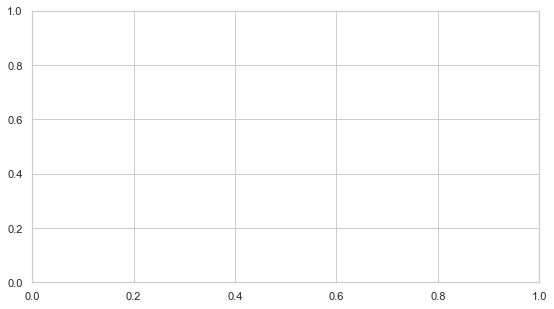

In [8]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment
base_color = sns.color_palette()[2]
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='CreditGrade',y='MonthlyLoanPayment',color=base_color);
plt.xlabel('CreditGrade');
plt.ylabel('Monthly Loan Payment');
plt.title(' Relationship between Creditgrade and MonthlyLoan Payment');

Research Question 6 : **Here we look at the Completed Loan Status
and Defaulted Rate to determine the accuracy of Credit Grade.**

In [ ]:
# Check the Bivariate Relatonship between CreditGrade and LoanStatus


Research Question 7 : **Now we know the Credit Grade is accurate
and is a tool that is used by the organization in determining the
person’s creditworthiness. Now we need to understand does the
ProsperScore, the custom built risk assesment system is being used
in determing borrower’s rate?**

From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness.

In [9]:
# Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.
g = sb.FacetGrid(data = df, col = 'Term', height = 5,
                margin_titles = True)
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR');
plt.colorbar()

NameError: name 'df' is not defined

**Business Insight**

Since the most important assest of a P2P lending Organization is its ability in using its tool to determine a borrower’s creditworthiness as accurate as possible. The organization would be more confident to market its organization as a great investment for investor to invest in hence leading to more borrower and higher market capitilization and boost revenue growth.